In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fenics import *
from dolfin import *
import pyvista as pv
import fenics as fe
import ufl
from utils_2 import *

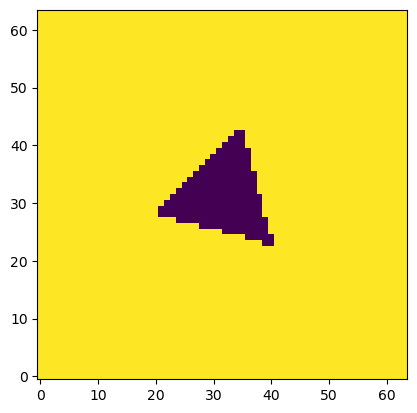

In [2]:
img = generate_geometry(center=[0.5,0.5],radius=0.2,n_sides=3, reso=64, angle_offset=45)
plt.imshow(img, origin='lower')


In [3]:
c=generate_mesh(img,"./meshes/t1")
c

True

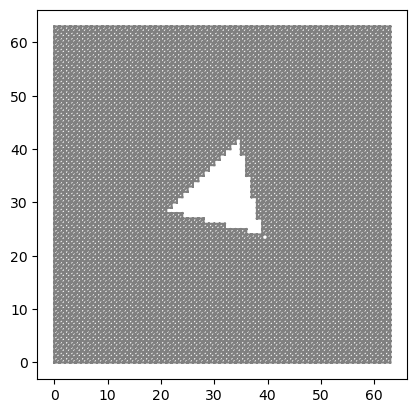

In [4]:
mesh_l=read_xdmf("./meshes/t1.xdmf")
plot(mesh_l)

In [20]:
simulate(mesh_l,plot_displacement=False,plot_stress=
False,plot_mesh=False,E=69e9,mu=50e5,rho_0=200.0,g_int=500,b_int=5,name="./fe_results/test_")

Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 6.081e+04 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.615e+03 (tol = 1.000e-10) r (rel) = 4.300e-02 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 9.513e-02 (tol = 1.000e-10) r (rel) = 1.564e-06 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 1.434e-07 (tol = 1.000e-10) r (rel) = 2.358e-12 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
0.23891791350808952


Min:  -62.65297161346418 Max:  201214.56528139944


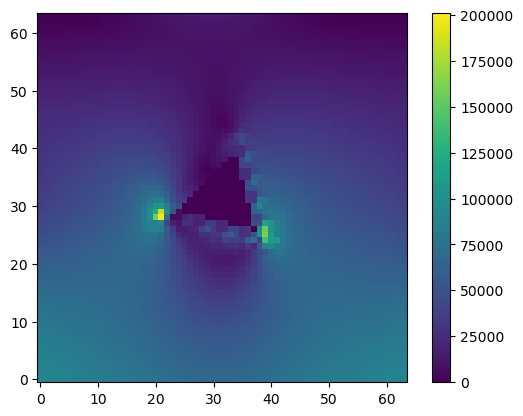

In [21]:
v=get_2d_res("./fe_results/test_",reso=64,min_max=True)
plt.imshow(v,origin="lower")
plt.colorbar()

In [22]:
v.max(),v.min()

(201214.56528139944, -62.65297161346418)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import glob2
from tqdm import tqdm
import pandas as pd

list_res= glob2.glob("./results_new_new/*.npy")
res_list2=glob2.glob("./results_new/*.npy")
l= list_res
print(len(list_res+res_list2))

95930


In [50]:
min_max=[]
for i in tqdm(l):
    d=np.load(i)
    s_m = d[-1]
    min_max.append([s_m.max(),s_m.min(),i])


100%|██████████| 55280/55280 [10:31<00:00, 87.56it/s] 


<Axes: >

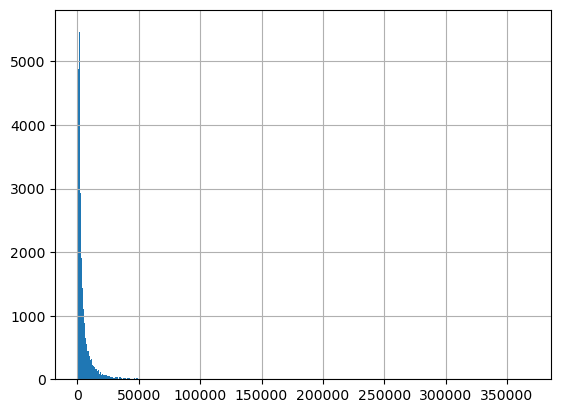

In [51]:
min_max=np.array(min_max)

df=pd.DataFrame(min_max,columns=["max","min","name"])
df["max"]=df["max"].astype(float)
df["min"]=df["min"].astype(float)
df["max"].hist(bins=1000)

(33168, 3)


<Axes: >

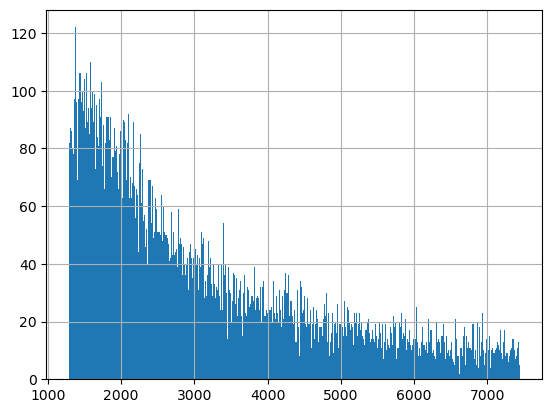

In [52]:
df_r=df[(df["max"]>df["max"].quantile(0.2)) & (df["max"]<df["max"].quantile(0.8))]

print(df_r.shape)
df_r["max"].hist(bins=1000)